In [1]:
import cmath
import sys 

#sys.setrecursionlimit(10000)

depth=8103
tx,ty=(9,758)
#tx,ty=(10,10)


types=".=|" #rocky, wet, narrow
gih={}
def gi(x,y):
    p=(x,y)
    global gih
    if p in gih:
        print("reuse: %d %d % 6d"%(x,y,len(gih)),end="\r")
        return gih[p]
    r=0
    if not p in [(0,0),(tx,ty)]:
        
        if y==0:
            r=x*16807
        elif x==0:
            r=y*48271
        else:
            r=el(x-1,y)*el(x,y-1)
    
    gih[p]=r
    return r
elh={}
def el(x,y):
    p=(x,y)
    if p in elh:
        return elh[p]
    r=(gi(x,y)+depth)%20183
    elh[p]=r
    return r

tpnames=["rocky","wet","narrow"]
tptools=["ct","cn","tn"]
def tp(x,y):
    return el(x,y)%3

totalrisk=0
for x in range(tx+1):
    for y in range(ty+1):
        totalrisk+=tp(x,y)
print("\npart1:",totalrisk,7743)






part1: 7743 7743


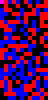

In [2]:
from PIL import Image
from IPython import display
import numpy as np
import cv2

m=3
w=tx+m
h=ty+m

pix = np.zeros([h,w,3]).astype(np.ubyte)
for y in range(h):
    for x in range(w):
        v=[[0,0,0],[0,0,255],[255,0,0]]
        pix[y,x,:]=v[tp(x,y)]
pix[ty,tx,:]=[255,0,255]
pix[0,0,:]=[255,0,255]
F=4          
pix = cv2.resize(pix, fx=F, fy=F, dsize=(0, 0), interpolation=cv2.INTER_NEAREST)
#display.clear_output(wait=True)
display.display(Image.fromarray(pix[:100,:,:], 'RGB'))


In [3]:
def H(x,y):
    return abs(x-tx)+abs(y-ty)
    
def isgoal(s):
    x,y,t,c,h=s
    if x==tx and y==ty and t=='t':
        print("\n\n\npart2",c,0)
        return True
    return False


#explore list
#x,y,tool,cost
e=[(0,0,'t',0, H(x,y))]
past={}
running=1
it=0

while len(e):
    x,y,t,c,h=e[-1]
    e=e[:-1]
    past[(x,y,t)]=1
    options=[]
    
    #swap tool
    for t2 in tptools[tp(x,y)]:
        if t!=t2:
            options.append((x,y,t2,c+7))
            
    #walk map
    for dx,dy in [[-1,0],[1,0],[0,-1],[0,1]]:
        xxx=x+dx
        yyy=y+dy
        if xxx>=0 and yyy>=0 and xxx<tx*6:
            if t in tptools[tp(xxx,yyy)]:
                options.append((xxx,yyy,t,c+1))
    
    for xxx,yyy,ttt,ccc in options:
        if not (xxx,yyy,ttt) in past:
            s2=(xxx,yyy,ttt,ccc,H(xxx,yyy))
            if isgoal(s2):
                running=0
                break
            e.append(s2)
            
    if not running:
        break
    
    e = sorted(e, key=lambda x: x[-2]+x[-1],reverse=True)
    
    it+=1
    if not it % 100:
        print("% 20s"%("%d %d %d"%(len(e),e[0][-2],e[0][-1])), end='\r')

print("fin")    

        
#1045 too high
#1058 too high
#1067
#1031








        2202 844 192


part2 1029 0
fin
